In [2]:
import os
import docx
import datetime
from num2words import num2words
from dateutil.relativedelta import relativedelta
import pandas as pd
import openpyxl as opxl
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/files")
doc = docx.Document('Template.docx')


def comma_separate(a):
    a = str(a)
    i = -1
    b = ''

    length = len(a)
    while length > 0:
        b = ',' + ''.join(reversed(a[i:i-3:-1]))  + b
        length -= 3
        i -= 3

    return b.strip(',')


def get_the_date(k):
    l = str(k)

    g = l[11:13]

    if g == '00':
        time = f"12{l[13:16]}am"

    elif  int(g)> 0 and int(g) < 12:
        time = f"{g}{l[13:16]}am"

    elif int(g) == 12:
        time = f"{g}{l[13:16]}pm"

    elif int(g)> 12:
        h = int(g)-12
        if h < 10:
            h = f"0{h}"
        time = f"{h}{l[13:16]}pm"
    else:
        pass

    if l[5:7] == '01':
        x = 'January'
    elif l[5:7] == '02':
        x = 'February'
    elif l[5:7] == '03':
        x = 'March'
    elif l[5:7] == '04':
        x = 'April'
    elif l[5:7] == '05':
        x = 'May'
    elif l[5:7] == '06':
        x = 'June'
    elif l[5:7] == '07':
        x = 'July'
    elif l[5:7] == '08':
        x = 'August'
    elif l[5:7] == '09':
        x = 'September'
    elif l[5:7] == '10':
        x = 'October'
    elif l[5:7] == '11':
        x = 'November'
    elif l[5:7] == '12':
        x = 'December'
    else:
        pass

    if l[9] == '1':
        y = 'st'
    elif l[9] == '2':
        y = 'nd'
    elif l[9] == '3':
        y = 'rd'
    else:
        y = 'th'

    if l[8:10] == '11' or l[8:10] == '12' or l[8:10] == '13':
        y = 'th'

    date = f"{l[8:10]}{y} of {x}, {l[0:4]}"
    
    return (time, date)


name = input("Please input investor's name:  ").upper().center(1)
capital = input("Please input capital invested in figures:  ").replace(',', '')
capital_words = str(num2words(int(capital))).replace('-', ' ').upper()
roi = int(int(capital) * 0.2 + int(capital))
roi_words = str(num2words(roi)).replace('-', ' ').upper()
date = get_the_date(datetime.datetime.now())
pay_date = get_the_date(datetime.datetime.now()+relativedelta(days = 31))


for paragraph in doc.paragraphs:
    for run in paragraph.runs:
        if 'OLUREMI DANIEL YINKA' in run.text:
            run.text = run.text.replace('MR OLUREMI DANIEL YINKA', name)

        if '12th of February, 2020' in run.text:
            run.text = run.text.replace('12th of February, 2020', date[1])
            
        if '12th of March, 2020' in run.text:
            run.text = run.text.replace('12th of March, 2020', pay_date[1])
            
        if 'FIFTY THOUSAND NAIRA ONLY (N50,000)' in run.text:
            run.text = run.text.replace('FIFTY THOUSAND NAIRA ONLY (N50,000)', capital_words+ f" NAIRA ONLY (₦{comma_separate(capital)})")

        if 'SIXTY FIVE THOUSAND NAIRA ONLY (N65,000)' in run.text:
            run.text = run.text.replace('SIXTY FIVE THOUSAND NAIRA ONLY (N65,000)', roi_words+ f" NAIRA ONLY (₦{comma_separate(roi)})")
    
    
doc.save(f"{name + ' MOU'}.docx")
         

         
wb = opxl.load_workbook("Book1 - Copy.xlsx")
sheet = wb['Sheet1']
max_row = sheet.max_row
sheet.cell(max_row+1, 1).value = 'JI-'+str(int(sheet.cell(max_row, 1).value[3:]) + 1)

correction = [sheet.cell(max_row+1, 1).value, name, comma_separate(capital), ", ".join(date), 
              comma_separate(int(int(capital) * 0.2)), comma_separate(roi), pay_date[1]]
l = 0
for i in sheet.rows:
    if l == max_row:
        b = 0
        for cell in i: 
            cell.value = correction[b]
            b += 1
    else:
        l += 1
        
wb.save("Book1 - Copy.xlsx")
         

         
#df = pd.read_csv("New.csv")
#df.loc[df.index[-1]+1] = ['JI-'+str(int(df.iloc[-1][0][3:]) + 1), name, comma_separate(capital), 
#                          ", ".join(date), comma_separate(int(int(capital) * 0.2)), comma_separate(roi), pay_date[1]]
#df.to_csv('New.csv', index= False)


Please input investor's name:  Mrs. Otutu Georgina
Please input capital invested in figures:  500000


Here are a couple of things you can access:


How many investors have I had? (Input 1)
How much has been invested with me? (Input 2)
How much ROI has been generated totally? (Input 3)
Who is my biggest investor? (Input 4)
Show me some information about amounts invested over the months (Input 5)
Show me some information about the number of investors I've had over the months (Input 6)
Show me some information about the ROIs generated over the months (Input 7)

5


What year do you want to check?  2020


₦0.0 was invested in January
₦50,000 was invested in February
₦0.0 was invested in March
₦0.0 was invested in April
₦12,640,000 was invested in May
₦0.0 was invested in June
₦0.0 was invested in July
₦0.0 was invested in August
₦0.0 was invested in September
₦0.0 was invested in October
₦0.0 was invested in November
₦0.0 was invested in Decemeber

This image has been saved in your 'Investment_project' folder


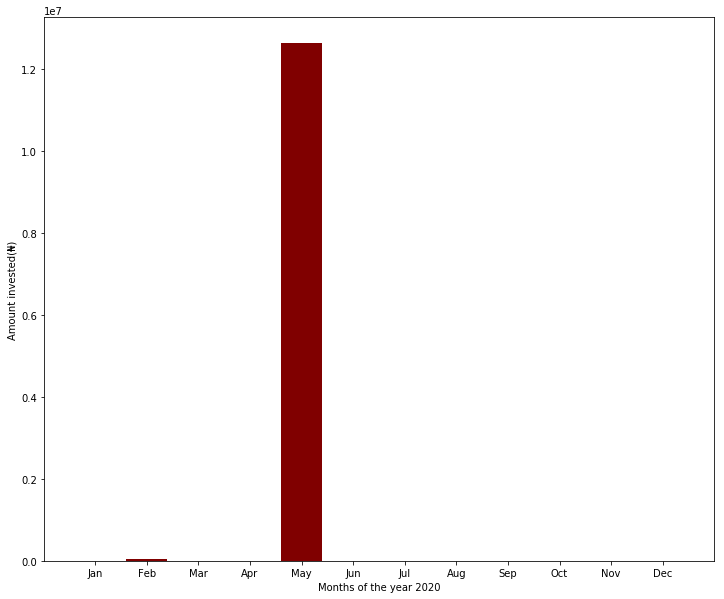

In [14]:
print("Here are a couple of things you can access:\n\n")
print("How many investors have I had? (Input 1)")
print("How much has been invested with me? (Input 2)")
print("How much ROI has been generated totally? (Input 3)")
print("Who is my biggest investor? (Input 4)")
print("Show me some information about amounts invested over the months (Input 5)")
print("Show me some information about the number of investors I've had over the months (Input 6)")
print("Show me some information about the ROIs generated over the months (Input 7)\n")

x = int(input())
print("\n")

def string_to_num(b):
    b = str(b)
    b = b.replace(',', '')
    return int(b)

df = pd.read_excel("Book1 - Copy.xlsx", skiprows=[x for x in range(0, 8)])
df["AMOUNT INVESTED(₦)"] = df["AMOUNT INVESTED(₦)"].apply(string_to_num)
df["ROI DUE(₦)"] = df["ROI DUE(₦)"].apply(string_to_num)
df["ROI + CAPITAL(₦)"] = df["ROI + CAPITAL(₦)"].apply(string_to_num)
capitals = np.array(df["AMOUNT INVESTED(₦)"])
rois = np.array(df["ROI DUE(₦)"])

if x == 5 or x == 6 or x == 7:
    year = input("What year do you want to check?  ").replace(' ', '')
    print("\n")
    
    def in_a_year(a):
        return a[-4:] == year
          
    a= []
    b= []
    c= []
    d= []
    e= []
    f= []
    g= []
    h= []
    i= []
    j= []
    k= []
    l= []
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'Decemeber']

    lists = [a, b, c, d, e, f, g, h, i, j, k, l]
          
    

    new_df = df[df["TIME INVESTED"].apply(in_a_year)].reset_index().drop("index", axis = 1)

    m = 0
    for i in new_df["TIME INVESTED"]:
        for n, o in zip(months, lists):
            if n in i:
                o.append(new_df.loc[m]["AMOUNT INVESTED(₦)"])
        m+= 1


    
    a= []
    b= []
    c= []
    d= []
    e= []
    f= []
    g= []
    h= []
    i= []
    j= []
    k= []
    l= []
    
    roilists = [a, b, c, d, e, f, g, h, i, j, k, l]
    roi_df = df[df["PAY DATE"].apply(in_a_year)].reset_index().drop("index", axis = 1)

    m = 0
    for i in new_df["PAY DATE"]:
        for n, o in zip(months, roilists):
            if n in i:
                o.append(new_df.loc[m]["ROI DUE(₦)"])
        m+= 1
        
        
        
if x == 1:
    print(f"You have had {sheet.cell(sheet.max_row, 1).value[3:]} investor(s)")
    
elif x == 2:
    print(f"{num2words(capitals.sum()).title()} Naira (₦{comma_separate(capitals.sum())})")

elif x == 3:
    print(f"{num2words(rois.sum()).title()} Naira (₦{comma_separate(rois.sum())})")
    
elif x == 4:
    a = list(capitals)
    index = a.index(max(a))
    print(f"{df.loc[index]['NAME']} with a capital of {num2words(a[index]).upper()} NAIRA (₦{comma_separate(a[index])})")

elif x == 5:      
    for n, o in zip(months, [np.sum(x) for x in lists]):
        print(f"₦{comma_separate(o)} was invested in {n}")

    plt.figure(figsize = (12,10))
    plt.bar([x[0:3] for x in months], [np.sum(x) for x in lists], color = (.5, 0, 0))
    plt.xlabel(f"Months of the year {year}")
    plt.ylabel("Amount invested(₦)") 
    #plt.title(f"Amount invested per month in the year {year}")

    plt.savefig("Investments_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")
          
elif x == 6:
    for n, o in zip(months, lists):
        print(f"{len(o)} investor(s) came in {n}")
    
    plt.figure(figsize = (12,10))
    plt.xlabel(f"Months of the year {year}")   
    plt.ylabel("Number of investors") 
    plt.bar([x[:3] for x in months], [len(x) for x in lists], color = (0, 0, 0))

    plt.savefig("Investors_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")
          
elif x == 7:
    for n, o in zip(months, [np.sum(x) for x in roilists]):
        print(f"₦{comma_separate(o)} was generated in {n}")

    plt.figure(figsize = (12,10))
    plt.bar([x[0:3] for x in months], [np.sum(x) for x in roilists], color = (0, 0, .5))
    plt.xlabel(f"Months of the year {year}")
    plt.ylabel("ROIs generated(₦)") 
    #plt.title(f"Amount generated per month in the year {year}")

    plt.savefig("ROI_per_month.png")
    print("\nThis image has been saved in your 'Investment_project' folder")

In [3]:
from docx2pdf import convert

In [6]:
convert("files/MR. OLU FATAI MOU.docx")
convert("files/MR. OLU FATAI MOU.docx", "files/MR. OLU FATAI MOU.pdf")


ImportError: DLL load failed: The specified procedure could not be found.